In [1]:
#Skip gram model of embedding the words

#Given a sequence of words, the task is to label each of them with a suitable POS tag.
Step 1 : Import the data from brown corpus - The corpus has list of sentences in words for each of the sentences
step 2: import gensim for doing word processing using word2vec
step 3: Creating the word embeddings of 300 Dim using word2Vec method 

In [1]:
#Import the libraries
import pandas as pd
import os

In [2]:
#import natural language tool kit
import nltk
nltk.download('brown')
#Details aboout Brown Corpus

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\BrindhaM\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [4]:
!python -m pip install -U gensim

Requirement already up-to-date: gensim in c:\users\brindham\anaconda3\lib\site-packages (3.8.3)


You should consider upgrading via the 'C:\Users\BrindhaM\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
import gensim

In [8]:
#import the brown corpus
from nltk.corpus import brown
#import the gensim model
from gensim.models import Word2Vec
#import multiprocessing for parallel processing
import multiprocessing

In [6]:
#point the sentences to sentences in brown corpus
sentences=brown.sents()
print(sentences[:2])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']]


In [7]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [8]:
news_text=brown.words(categories='news')
import nltk
fdist=nltk.FreqDist(words.lower() for words in news_text)

In [9]:
#Frequency of the words
fdist

FreqDist({'the': 6386,
          'fulton': 14,
          'county': 61,
          'grand': 19,
          'jury': 46,
          'said': 406,
          'friday': 41,
          'an': 311,
          'investigation': 11,
          'of': 2861,
          "atlanta's": 4,
          'recent': 20,
          'primary': 17,
          'election': 41,
          'produced': 6,
          '``': 732,
          'no': 120,
          'evidence': 17,
          "''": 702,
          'that': 829,
          'any': 94,
          'irregularities': 3,
          'took': 47,
          'place': 33,
          '.': 4030,
          'further': 18,
          'in': 2020,
          'term-end': 1,
          'presentments': 1,
          'city': 93,
          'executive': 18,
          'committee': 75,
          ',': 5188,
          'which': 245,
          'had': 281,
          'over-all': 2,
          'charge': 18,
          'deserves': 3,
          'praise': 2,
          'and': 2186,
          'thanks': 6,
          'atlanta':

In [12]:
#Conditional frequency distribution of the plot
cfd = nltk.ConditionalFreqDist(
            (genre,word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))
genres=['news', 'religion', 'hobbies', 'science_fiction']
modals=['Sports','love']
cfd.tabulate(conditions=genres,samples=modals)
         

                Sports   love 
           news      4      3 
       religion      0     13 
        hobbies      0      6 
science_fiction      0      3 


In [13]:
count=0
for words in brown.words():
    count=count+1
print("The count of the words in Brown Corpus",count)

The count of the words in Brown Corpus 1161192


In [14]:
#Train the model for embeddings
#use word2vec for training the embeddings

#define the parameters for word2Vec :
#size : size of the embedding dimensions
#window : the number of words around the target word for capturing the context/target
#min_count: the threshold of min fequency above which the embeddings will be applied
#negative : Negative samples drawn for every correct sample
#iter:Epochs for the training data
#workers : Worker threads for training the model


In [15]:
#Set the embedding dimension
EMB_DIM= 300
#Train the model
#W2V is the model
w2v=Word2Vec(sentences,size=EMB_DIM,window=5,min_count=5,negative=15,iter=10,workers=multiprocessing.cpu_count(),sg=1,seed=42)
#The initialization parameter sg controls the mode. If True-ish (sg=1), skip-gram is used; if False-ish (sg=0), CBOW is used

In [6]:
w2v.save("Word2Vec.model")

NameError: name 'w2v' is not defined

In [8]:
#Set the embedding dimension
#EMB_DIM= 300
#Train the model
#W2V is the model
#w2v=Word2Vec(sentences,size=EMB_DIM,window=5,min_count=5,negative=15,iter=10,workers=multiprocessing.cpu_count())
#The initialization parameter sg controls the mode. If True-ish (sg=1), skip-gram is used; if False-ish (sg=0), CBOW is used

In [9]:
#Load the model
w2v=Word2Vec.load("Word2Vec.model")

In [26]:
#get the trained embeddings 
#w2v is the embedding matrix with wieght vectors
word_vectors=w2v.wv


In [29]:
#GET the vocab
vocab=list(word_vectors.vocab)
vocab=vocab[:1000]
print(vocab)


['The', 'Fulton', 'County', 'Grand', 'said', 'Friday', 'an', 'investigation', 'of', 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'jury', 'further', 'in', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'deserves', 'praise', 'and', 'thanks', 'Atlanta', 'for', 'manner', 'was', 'conducted', 'term', 'been', 'charged', 'by', 'Superior', 'Court', 'Judge', 'to', 'investigate', 'reports', 'possible', 'won', 'Allen', 'Jr.', 'Only', 'a', 'relative', 'handful', 'such', 'received', 'considering', 'widespread', 'interest', 'number', 'voters', 'size', 'this', 'city', 'it', 'did', 'find', 'many', "Georgia's", 'registration', 'laws', 'are', 'or', 'inadequate', 'often', 'ambiguous', 'It', 'recommended', 'legislators', 'act', 'have', 'these', 'studied', 'revised', 'end', 'improving', 'them', 'grand', 'commented', 'on', 'other', 'topics', 'among', 'purchasing', 'departments', 'well', '

In [20]:
#The vocab representation of the words
for i,j in word_vectors.vocab.items():
    print(i,j.index)

The 14
Fulton 5615
County 1280
Grand 5377
said 59
Friday 1852
an 34
investigation 2586
of 3
recent 595
primary 1162
election 1521
produced 1206
`` 12
no 67
evidence 475
'' 13
that 8
any 84
irregularities 9647
took 220
place 188
. 2
jury 1754
further 499
in 7
the 0
City 762
Executive 8895
Committee 1235
, 1
which 35
had 25
over-all 3165
charge 869
deserves 5880
praise 5616
and 4
thanks 3917
Atlanta 3166
for 11
manner 838
was 10
conducted 2046
term 1391
been 48
charged 1962
by 24
Superior 5881
Court 960
Judge 2861
to 5
investigate 7781
reports 1407
possible 254
won 1604
Allen 4961
Jr. 1469
Only 1062
a 6
relative 2530
handful 6888
such 91
received 609
considering 2862
widespread 3602
interest 303
number 200
voters 5378
size 742
this 32
city 375
it 16
did 105
find 239
many 112
Georgia's 8896
registration 4438
laws 1247
are 29
or 31
inadequate 3421
often 285
ambiguous 4590
It 56
recommended 2411
legislators 5882
act 596
have 33
these 89
studied 1392
revised 6528
end 235
improving 5883
them 

reducing 3610
learning 1853
educational 1701
methods 743
C. 1165
teaches 7795
history 365
24 2314
12 1132
semester 8299
hours 567
so-called 3521
teaching 1831
required 543
junior 3710
senior 3522
high 204
normal 755
college 611
30 945
teachers 1734
least 288
credit 2055
subject 643
remainder 5170
subjects 1375
person 585
master's 11759
degree 828
physics 5171
chemistry 5896
English 496
permitted 1969
teach 2730
College 1038
150 8916
immediately 900
joined 2056
Junior 2420
named 1333
Dr. 511
Clarence 9665
Clark 3173
Hays 11760
president 829
succeed 6545
retire 8917
close 424
holds 2731
earned 5386
Doctor 6904
University 840
Oklahoma 6905
Master 7796
Science 4049
& 612
addition 723
Rhode 1029
Island 756
Massachusetts 2246
Institute 2482
Technology 9666
captain 2537
basketball 9667
team 1351
football 3611
served 878
athletic 6906
High 3098
instructor 9668
associate 5629
professor 3937
border 6546
patrolman 11761
Signal 10574
Corps 1297
Army 1492
recommendation 4317
Chester 8300
O. 3711
ra

consent 5912
provision 2428
included 1155
sewer 8948
ordinance 8949
plead 13241
guilty 3720
minor 2286
traffic 1858
offenses 13242
station 1169
Town 7816
Michael 7817
draft 5913
At 230
authorized 3020
adopt 6922
Nothing 2131
Sixth 11799
disposition 6923
Local 6249
hesitated 4774
heavy 1003
simplest 8327
offense 9691
Mitchell 4065
Walter 2792
value 479
using 782
remark 3531
carcass 10607
Dumont 8328
spoke 1255
100 1432
Park 2429
controversial 7364
Westfield 11800
Young 4066
cocktail 4334
Scotch 13243
Plains 8329
Country 7365
greeted 4994
chorus 5648
500 5914
women 541
forum 10608
Federation 7366
Women's 7367
Clubs 13244
intention 3106
stopped 803
beating 6924
Now 362
he's 1859
gone 520
sell 2793
tattered 13245
remains 1301
love 453
considered 676
mediocre 13246
nothing 272
fall 753
common 465
decency 8330
proud 2254
dead 599
regretted 7818
wrong 814
inject 13247
waged 10609
issues 1669
respond 4775
either 354
applause 6576
merit 3951
open 326
launched 4776
continuance 11801
passenger 65

10,000 6598
light 306
1,000 7852
Illinois 2809
800 6951
England 657
vision 2074
8,000 10654
accomplish 4349
necessitate 13313
meets 3277
ability 1499
capsule 13314
includes 2506
mature 3542
pioneer 5425
strategic 5205
centers 2178
pastors 11845
volunteers 4213
laymen 11846
lending 10655
graduates 5940
Powell 6282
motions 5672
fraud 10656
dismissal 10657
striking 2888
verdict 6283
denying 8357
trials 2889
upheld 11847
defendant 11848
Philip 4797
linking 13315
Proof 9739
proof 3452
mails 10658
Miami 4629
Fla. 8358
Orioles 7853
distinction 2747
clubs 5206
dropped 1085
sixth 5012
straight 943
exhibition 5013
5 720
late 563
Birds 7854
hits 4798
homer 8972
Over 3625
frames 4086
Fisher 13316
middle 1188
Oriole 13317
pennant 8973
A's 11849
yielding 8974
Dick 5426
entered 1112
contest 4350
existed 2810
deadlock 8975
solo 10659
runs 2075
eighth 5673
ninth 6284
fifth 4630
throws 11850
wild 2212
stole 8359
dirt 2675
Heywood 13318
Sullivan 9740
catcher 6285
singled 8360
proved 1550
winning 3543
sou

bushes 9026
talent 2819
Industry 8392
cultural 2292
activities 973
instance 1342
dancers 3737
whirling 9027
obstacle 8393
smoothed 10705
separated 2619
Egypt 6618
Republic 3190
First 886
Honolulu 11918
Japan 2968
Hong 7878
Kong 7879
Pakistan 10706
Rome 1575
London 1234
look 264
youngest 7419
Molly 13398
gown 5971
fitted 5034
invitations 6986
addressed 5223
tea 3967
Arts 4361
folk 3377
festival 7420
singers 6987
Chicago's 8394
sing 3968
songs 1984
Byron 5972
Italian 2378
studying 2969
Florence 13399
Europe 896
telling 2216
engagement 4643
girl 460
publishing 6988
farewell 7421
canceled 11919
King 1770
costumes 5449
Towne 13400
trees 1147
streets 1985
wheeled 8395
trains 6304
en 13401
Phoenix 9028
Ariz. 13402
portable 6989
typewriter 8396
hinted 10707
ain't 2681
Pretty 9788
Tommy 5450
promotional 11920
She's 4097
fallout 3555
shelters 4229
beer 3465
nights 3556
Everybody 7422
ethics 6990
morals 11921
Gary 13403
Lucille 6991
Ball 9029
scoop 13404
Jane 3191
Russell 7423
singing 2557
appear

99 9832
Heights 7927
Stein 6006
Aaron 10784
Son 4247
cemetery 7928
omitted 7029
Achievement 9833
judged 6323
competition 2028
Tim 4248
Larson 13516
Wilson 1817
guided 5051
regional 3052
barbecue 7030
stockholders 4111
dividend 11998
investment 2826
teenagers 13517
guidance 2975
youngsters 6007
businesses 5472
adult 4377
drawn 1624
distributed 3980
Nevada 11999
Jefferson 3981
Madison 4498
Hillsboro 7929
day's 6643
flower 5473
shows 1160
skies 9073
attract 5240
baton 13518
Sue 13519
Results 9834
sheep 5241
ribbons 12000
exhibited 9074
Banks 5720
blues 7457
rabbit 7930
poultry 8448
judging 8449
eggs 3198
male 3053
female 2339
bird 4249
Strong 9835
cooked 9075
Millie 13520
economics 7031
demonstration 4250
appeals 7032
assessors 5242
assessments 12001
assessment 4659
properties 1847
quarterly 13521
69 10785
shoulder 1909
pains 6644
onto 1873
slightly 1345
Cranston 6008
furs 13522
coins 9076
Stephen 5474
theft 8450
Drive 7458
coat 2630
Persian 8451
lamb 12002
wallet 12003
French 741
valued 

appreciated 7959
nondescript 13609
supposedly 7488
relegated 12074
parlor 5496
decorator 13610
Solid 10845
Century 4674
Kings 13611
Plus 13612
outfit 6032
comedy 3058
distinctly 7489
displaying 13613
drums 6667
guitar 5737
batch 13614
instruments 4262
imagination 1728
props 12075
nonsense 8489
pure 2117
rated 9135
let's 3867
noise 3059
stick 3060
elsewhere 2571
Phillips 7960
refer 3993
Sir 1851
brings 2831
pulling 4675
pursuing 10846
rhythm 4862
substantially 3143
format 13615
piano 3656
bass 6033
trumpet 10847
personality 2389
accompanying 5738
frantic 7961
appraisal 9889
Cafe 13616
ownership 4676
retains 9136
crystal 5739
undergone 8490
prime 3061
beef 3657
dish 6349
stuffed 13617
features 1389
pianist 6668
Lauderdale 12076
redhead 10848
Governor's 13618
reunion 8491
hasn't 5065
wash 3391
Mexican 4391
Which 4863
understandable 7067
you've 2636
sampled 10849
Papa 2832
John's 4864
distinguished 2763
island 3486
productions 12077
Le 9890
Theatre 8492
Du 1653
Ballet 5740
Francesca 9891
s

nut 6389
volunteer 9964
Border 12168
sheriff's 13727
surged 10933
ordinarily 7533
consumed 7106
airplane 8007
steal 13728
shadows 5089
Mountains 9191
pry 12169
luggage 8550
subsequently 8551
Coolidge 4135
high-school 13729
Beardens 13730
slug 9192
Simmons 8552
raced 7534
flattened 12170
silenced 13731
engines 5770
Crosby 13732
eased 9965
distracted 13733
pocket 2709
nodded 2230
Taking 7535
0 4687
requested 7536
labeled 9193
B-52 9194
long-range 2844
bombers 4688
Command 6709
all-important 13734
Food 7107
stew 13735
ceased 7537
Maine 9195
menu 13736
drab 13737
soup 6710
ventured 13738
toll-road 9966
turnpikes 8553
Higher 9196
toll 6711
speculative 9967
Things 10934
streams 8008
investments 12171
slipped 3497
rises 5292
risen 8554
unmarried 13739
happening 3879
turnpike 12172
Turnpike 9197
slumped 9968
preceding 3675
successes 4689
Success 10935
rosy 10936
extensions 13740
access 4402
illustration 6062
Further 4403
deficiency 8009
opportunities 2349
planners 7108
Already 6063
margins 121

narrower 11050
Publications 9268
Listen 5803
presentations 12277
inexpensive 12278
recordings 8603
Thanks 8604
Records 12279
Lincoln's 13881
memorable 8065
Lincoln 2404
releases 10035
Laboratory 6416
RCA 12280
Victor 4704
guides 9269
Arizona 9270
depressing 13882
fifties 11051
complexes 12281
brains 5804
ego 7153
financially 10036
wondering 5109
breathed 9271
freely 4705
seller 12282
bull's-eye 8605
2-year-old 13883
verbal 5309
senses 6417
explanations 6418
angrily 12283
sweet 1631
helper 12284
desires 4414
reassurance 10037
temptations 12285
substitutes 13884
magazines 4285
refrigerator 4546
louder 7568
Remove 10038
melancholy 10039
scenes 3779
opponent 6419
thrown 2848
uncertainties 13885
lion 6749
ruined 6101
precaution 10040
cruel 6750
continually 4286
perfume 8606
laughter 4706
leaves 2351
wine 1656
undergraduates 10041
fleeting 12286
glances 13886
goat 12287
dream 1885
wry 13887
wit 5110
embrace 7154
exhausted 6420
hairs 7569
fading 13888
wears 12288
akin 8607
straining 11052
pan

communicative 12392
admirable 8661
continuity 4423
intimate 4912
exuberant 11148
identifiable 14026
closes 12393
settings 9326
witty 8662
stamped 11149
cliches 14027
souls 4721
enters 7191
unsuccessful 10136
overcomes 11150
awfully 8663
forgotten 3086
blaze 11151
impassioned 10137
proficient 14028
Laura 5125
intensely 8664
vibrant 12394
shriek 14029
explode 12395
belligerent 14030
projection 9327
Musical 14031
Where's 12396
lyrics 6450
Christopher 14032
Amy 6451
Shelley 7601
Berman 12397
Love 5825
rousing 10138
chords 12398
whispering 14033
Aunt 6778
Girl 9328
sparkling 14034
cheerful 9329
positively 9330
evoke 12399
resemblance 7192
amazed 8108
sincerity 7193
Charlotte 7602
Jen 11152
cop 6779
promoted 7603
novelties 11153
touring 14035
wondered 1959
upright 6780
virtual 14036
commonly 3903
profess 14037
whipping 11154
plunge 14038
Dolores 5126
Paula 5328
biting 12400
Silence 14039
detective 2406
sensibility 11155
admirably 14040
genius 4558
subtly 12401
intricate 8665
forthright 12402

wailing 14219
pleading 7644
Practically 12519
vent 9387
pounding 12520
gate 3418
sword 12521
sinned 12522
debt 7222
refuge 11268
mountains 3332
and/or 5838
Classical 14220
Lo 4931
Shu 4932
dynasty 14221
B.C. 5133
despotism 14222
divergent 14223
survived 6805
symbolism 10238
Han 9388
sprang 7223
numerical 5341
diagrams 10239
anyhow 6154
fullest 14224
mathematical 4564
hints 9389
diagram 8732
arbitrarily 14225
symbolically 14226
activated 14227
opposing 7224
pairs 6806
Yang 7645
Yin 10240
leveled 7225
harmonious 14228
axis 3333
tendencies 14229
reverence 14230
stimulated 11269
Directions 14231
emperor 11270
ascribed 14232
Near 10241
initiated 7646
exerted 7226
workings 12523
philosophers 9390
Universal 14233
Moon 8154
equated 14234
mountain 4024
upside 10242
maps 7227
evangelism 12524
fellowship 4158
Membership 11271
Preparation 9391
pastoral 12525
postponed 9392
enclosed 8155
History 5578
Following 6155
topic 9393
Supper 11272
denominational 9394
enrich 14235
Have 2275
hesitate 8733
exa

carbon 3910
nitrogen 8782
lung 6489
mouthpiece 11391
outlines 12690
pen 6178
meters 8200
sonar 14446
generator 6841
evaluation 3792
transducer 8783
computer 7254
receivers 14447
cm. 7696
antenna 7255
detected 7697
receiver 7256
transmitted 10325
detection 7257
exploration 4739
submerged 11392
indicator 10326
anatomical 9478
specially 9479
lens 7698
tub 7258
veins 12691
Oersted's 11393
boyhood 14448
educate 12692
surveyor 14449
borrow 9480
stimulate 12693
Copenhagen 12694
lodging 14450
supplemented 12695
banished 11394
essay 5354
Poetry 12696
divisive 14451
Oersted 7259
voltaic 11395
Ritter 9481
host's 14452
fertile 14453
disorganized 14454
discoveries 9482
fantasy 7699
celestial 10327
1819 11396
reckon 14455
salts 12697
pursue 5149
faculties 14456
esteem 14457
magnetism 11397
similarity 9483
fuse 14458
vapor 8201
electrostatic 10328
Electrical 11398
polarity 14459
Drug 12698
drugs 3911
assumes 10329
bacterial 7260
diarrhea 11399
incidence 11400
bloat 10330
grams 5592
scours 14460
0.1 9

analyst 11469
poems 1440
bias 10386
Torrio 7718
O'Banion 4302
Cicero 14594
lethal 14595
murders 7719
disliked 8225
Capone 12791
Hell 4946
waiter 8822
methodically 12792
waiters 14596
O'Banion's 9526
1909 14597
Ryan 6502
Telegraph 7273
O'Connor 14598
jerked 7720
liking 8226
insolence 12793
buckle 14599
cops 5859
proliferation 14600
tsunami 5361
earthquake 9527
catastrophic 14601
Plato's 6854
Osaka 12794
crest 7721
gravity 12795
detectable 10387
amplitude 12796
rattling 11470
glowed 12797
organism 12798
swollen 7722
earthquakes 11471
calculations 9528
Garryowen 6855
cavalry 6183
trooper 12799
7th 7723
Fighting 9529
saloon 8823
Mel 10388
ridden 12800
swivel 14602
Depot 8824
Custer 14603
troopers 14604
Goulding 11472
Leyte 12801
platoon 11473
hurling 14605
G 7274
Okay 6856
battlefield 14606
graphic 14607
oppressed 14608
abreast 14609
reputed 14610
backwoods 14611
isolation 6184
mask 9530
violently 7724
misunderstood 12802
pretended 12803
decisively 14612
rattle 14613
thumping 14614
shutter

Ptolemy's 12928
epicycles 12929
velocities 12930
resultants 14802
lunar 8845
approximated 14803
astronomical 12931
monster 14804
Henrietta 2779
Harper's 14805
Mamma 10438
Szold 8251
Jastrow 8252
nephew 9564
rabbi 12932
mustache 14806
Rabbi 11575
Joe's 14807
unwillingness 14808
Jo 12933
Sadie 14809
descriptions 8846
Olgivanna 11576
Miriam 3703
Taliesin 8253
warrants 14810
Constable 14811
Weston 10439
generalized 9565
doctor's 5603
mattered 14812
taut 10440
awaken 11577
hormone 7296
maternal 14813
writ 11578
tact 14814
indulged 14815
eyed 11579
sparse 14816
Poet 3597
Lilian 11580
urgently 12934
transactions 14817
broadly 12935
scout 12936
Bang-Jensen 4304
Bang-Jensen's 12937
hairy 14818
glared 14819
Shann 9566
Manley 12938
Caravan 14820
Heard 11581
Adoniram 12939
trousers 11582
chimney 11583
chattering 12940
Whig 12941
Tories 12942
Steele 4953
Molesworth 11584
Steele's 7742
Succession 11585
Crisis 14821
pretentious 12943
asserts 14822
whoever 14823
showered 14824
reviews 9567
parliamenta

skiff 9625
spat 9626
Pastern 9627
hallway 11695
Flannagan 11696
stockings 15100
Myra 4040
glare 11697
Jessica 6884
hugging 11698
mast 13115
Pedersen 8880
cough 11699
crib 15101
froze 15102
shovel 15103
She'd 7327
flopped 13116
Stowey 15104
stool 10532
eyebrows 9628
rustling 8881
Linda 2719
Ada 5875
blushed 13117
Alex's 8882
scrawled 15105
knocking 15106
Eyes 8883
fille 13118
Leona 15107
lavender 15108
unbearable 13119
kissing 15109
Homicide 15110
bartender 13120
slacks 11700
Roberta 13121
Lauren 8884
Vince 8276
Grosse 9629
driver's 15111
Jarrodsville 13122
lurched 15112
Rourke 5373
Shayne 4041
Geely 11701
Perrin 13123
dived 15113
holster 8885
okay 13124
it'll 9630
Hirey 13125
Black's 13126
Skyros 5162
Angie 5876
Katharine 13127
kittens 15114
Lolotte 10533
Emile 15115
Maude 4957
Lucien 8886
Glendora 7328
Rev 8277
Gilborn 6207
Kitti 5611
fingerprint 13128
Gibby 11702
Hub 8887
Paxton 11703
Bonner 13129
plowed 15116
clapping 15117
Holden 9631
overalls 15118
Mae 6208
darted 13130
Willings 1

In [12]:
#print the vectors shape post the training 
word_vectors.vectors.shape
#Compare this with original vocab size of ~1161192
#1.3% of original vocabulary is retained


(15173, 300)

In [13]:
#Vectors for the different words
word_vectors.vectors

array([[ 0.14143984, -0.06803824,  0.184393  , ...,  0.08023538,
         0.10810094, -0.08917741],
       [ 0.34472135, -0.05301099,  0.09041218, ...,  0.05838839,
        -0.00579977, -0.23796007],
       [ 0.16417782,  0.04655231,  0.02733903, ...,  0.23397845,
         0.21111545, -0.09255654],
       ...,
       [ 0.09115402, -0.12034506, -0.04584361, ...,  0.07240134,
         0.0475884 ,  0.04863478],
       [ 0.13145816, -0.13612768, -0.00976463, ..., -0.02596147,
        -0.00103161, -0.07584613],
       [ 0.17165014, -0.10681411, -0.06679516, ...,  0.01085849,
         0.07959346, -0.01352228]], dtype=float32)

In [14]:
#apply the functions
result=word_vectors.similar_by_word("Saturday")
print("Most similar words to 'Saturday':\n",result[:3])

result=word_vectors.similar_by_word("money")
print("Most similar words to 'Money':\n",result[:3])

result=word_vectors.similar_by_word("child")
print("Most similar words to 'child':\n",result[:3])

result=word_vectors.most_similar(positive=['child'],negative=['person'])
print("Most similar words to 'child' but dissimilar to 'person':\n",result[:3])

result = word_vectors.doesnt_match("Saturday Wednesday Food".split())
print("Odd man out:\n",result)

result = word_vectors["child"]
print("Numy vector rep for the word child is :\n",result)

Most similar words to 'Saturday':
 [('Sunday', 0.8205392360687256), ('Friday', 0.8174380660057068), ('Wednesday', 0.7991936802864075)]
Most similar words to 'Money':
 [('clothing', 0.652639627456665), ('repay', 0.6496089696884155), ('unemployment', 0.6455485224723816)]
Most similar words to 'child':
 [('teacher', 0.6766624450683594), ('autistic', 0.6743035316467285), ('temper', 0.6723817586898804)]
Most similar words to 'child' but dissimilar to 'person':
 [('children', 0.2810821533203125), ('health', 0.2737591862678528), ('fever', 0.2313023805618286)]
Odd man out:
 Food
Numy vector rep for the word child is :
 [ 0.24972191 -0.3348287   0.17172562 -0.24653614 -0.11415448  0.04901123
 -0.30275226 -0.15688747 -0.01408158 -0.12580849  0.26084846  0.28095633
  0.09134301  0.01772306 -0.160127   -0.16246857  0.22818233  0.19497809
  0.31835875 -0.12774217 -0.25051245 -0.00518931 -0.11919818  0.14593425
  0.14408255 -0.17651492  0.2761898  -0.11265213 -0.00625727 -0.2068525
  0.0353156   0.0

C:\Users\BrindhaM\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [15]:
#use the embeddings for POS tagging model
#few POS tags are noun,verbs and adjective/adverb
X_pca=word_vectors.vectors[0:1000]


In [16]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2).fit_transform(X_pca)
tsne.shape

(1000, 2)

In [33]:
df = pd.DataFrame(tsne, index=vocab,columns=['X','Y'])
#view the df
df

,X,Y
The,-1.685825,-12.949410
Fulton,-2.163307,-13.447377
County,-2.255297,-13.418584
Grand,-0.924497,-11.838836
said,-1.680172,-13.403362
Friday,-14.594801,-15.419973
an,-0.424310,-5.070246
investigation,-0.853016,-12.278696
of,-17.383961,2.931399
recent,23.341425,19.714397


The
X    -1.685825
Y   -12.949410
Name: The, dtype: float32
Fulton
X    -2.163307
Y   -13.447377
Name: Fulton, dtype: float32
County
X    -2.255297
Y   -13.418584
Name: County, dtype: float32
Grand
X    -0.924497
Y   -11.838836
Name: Grand, dtype: float32
said
X    -1.680172
Y   -13.403362
Name: said, dtype: float32
Friday
X   -14.594801
Y   -15.419973
Name: Friday, dtype: float32
an
X   -0.424310
Y   -5.070246
Name: an, dtype: float32
investigation
X    -0.853016
Y   -12.278696
Name: investigation, dtype: float32
of
X   -17.383961
Y     2.931399
Name: of, dtype: float32
recent
X    23.341425
Y    19.714397
Name: recent, dtype: float32
primary
X   -27.446440
Y   -13.143519
Name: primary, dtype: float32
election
X    5.618214
Y    1.086589
Name: election, dtype: float32
produced
X   -17.305710
Y    -1.422641
Name: produced, dtype: float32
``
X   -17.299927
Y    -1.404782
Name: ``, dtype: float32
no
X    1.163900
Y   -5.703955
Name: no, dtype: float32
evidence
X   -32.255009
Y    -8.1267

Name: interim, dtype: float32
citizens
X   -13.113613
Y   -28.699486
Name: citizens, dtype: float32
committee
X    21.707764
Y    -2.383783
Name: committee, dtype: float32
These
X    20.858353
Y   -10.012776
Name: These, dtype: float32
actions
X    10.583722
Y    -7.924087
Name: actions, dtype: float32
serve
X    12.846313
Y     4.032261
Name: serve, dtype: float32
protect
X   -1.021312
Y   -0.024846
Name: protect, dtype: float32
fact
X     4.261226
Y   -18.720518
Name: fact, dtype: float32
effect
X    10.967773
Y   -33.228611
Name: effect, dtype: float32
from
X   -12.480369
Y   -19.154737
Name: from, dtype: float32
undue
X   -8.426351
Y   -8.072017
Name: undue, dtype: float32
costs
X   -14.243486
Y    -6.933668
Name: costs, dtype: float32
appointed
X    13.140307
Y    14.126226
Name: appointed, dtype: float32
elected
X   -29.083933
Y   -17.687393
Name: elected, dtype: float32
servants
X   -12.536770
Y   -13.433391
Name: servants, dtype: float32
criticisms
X    10.328717
Y   -25.867334

Name: areas, dtype: float32
determine
X    -1.085771
Y   -14.472764
Name: determine, dtype: float32
what
X   -21.438274
Y   -10.570196
Name: what, dtype: float32
adjustments
X     2.960406
Y   -17.630301
Name: adjustments, dtype: float32
made
X     1.411853
Y    28.466709
Name: made, dtype: float32
Vandiver
X     1.970167
Y   -19.162035
Name: Vandiver, dtype: float32
traditional
X    -5.866209
Y   -16.262611
Name: traditional, dtype: float32
visit
X    12.361278
Y    -0.527640
Name: visit, dtype: float32
chambers
X    16.712296
Y   -32.065132
Name: chambers, dtype: float32
toward
X   -11.229038
Y    21.971855
Name: toward, dtype: float32
likely
X     9.125810
Y    18.272987
Name: likely, dtype: float32
mention
X   -18.635828
Y    21.361935
Name: mention, dtype: float32
$100
X     3.662639
Y   -16.486410
Name: $100, dtype: float32
million
X   -26.178488
Y   -14.318520
Name: million, dtype: float32
issue
X   -8.462272
Y   -0.671410
Name: issue, dtype: float32
earlier
X   -11.440907
Y   -

Name: endorse, dtype: float32
increased
X    15.362419
Y    26.021889
Name: increased, dtype: float32
support
X   -6.647951
Y   -9.939085
Name: support, dtype: float32
provided
X    -7.127203
Y    31.632141
Name: provided, dtype: float32
expended
X    11.746396
Y   -23.687435
Name: expended, dtype: float32
13th
X    24.569897
Y    24.445992
Name: 13th, dtype: float32
members
X    14.285107
Y    -2.457276
Name: members, dtype: float32
congressional
X    20.387125
Y    12.913765
Name: congressional, dtype: float32
delegation
X    -9.581276
Y    19.321646
Name: delegation, dtype: float32
Washington
X    28.776623
Y     3.864918
Name: Washington, dtype: float32
like
X   -2.219082
Y    5.227513
Name: like, dtype: float32
see
X     8.360528
Y   -21.840466
Name: see, dtype: float32
But
X   -4.205711
Y    2.550531
Name: But, dtype: float32
congressmen
X     3.523564
Y    16.724697
Name: congressmen, dtype: float32
specifically
X    29.045084
Y    21.466148
Name: specifically, dtype: float32
hi

permits
X    -9.596333
Y   -11.216363
Name: permits, dtype: float32
over
X    11.001843
Y   -32.781590
Name: over, dtype: float32
bank
X   -18.414917
Y   -18.577000
Name: bank, dtype: float32
accounts
X    -0.544557
Y    14.978008
Name: accounts, dtype: float32
stocks
X    21.529598
Y    17.214136
Name: stocks, dtype: float32
personal
X    18.820463
Y    22.497004
Name: personal, dtype: float32
persons
X     5.569335
Y    19.850220
Name: persons, dtype: float32
missing
X    11.926995
Y    12.302884
Name: missing, dtype: float32
seven
X   -11.975656
Y   -17.237938
Name: seven, dtype: float32
bill
X    17.135309
Y     9.926478
Name: bill, dtype: float32
banks
X     1.408307
Y   -21.860319
Name: banks, dtype: float32
insurance
X    -5.911171
Y   -10.347579
Name: insurance, dtype: float32
firms
X    10.090692
Y    23.539963
Name: firms, dtype: float32
companies
X    10.791960
Y    14.650726
Name: companies, dtype: float32
corporations
X   -17.001522
Y    16.925413
Name: corporations, dtype

Name: willing, dtype: float32
stake
X    15.389630
Y     2.663435
Name: stake, dtype: float32
my
X     6.328436
Y   -20.898895
Name: my, dtype: float32
San
X    8.279931
Y    9.299894
Name: San, dtype: float32
Antonio
X    -1.465260
Y   -18.534437
Name: Antonio, dtype: float32
ponies
X   -19.179483
Y    15.383085
Name: ponies, dtype: float32
heard
X    14.912725
Y     8.905482
Name: heard, dtype: float32
option
X   -1.680472
Y    7.632849
Name: option, dtype: float32
proposal
X    -0.436096
Y   -18.990234
Name: proposal, dtype: float32
favorable
X   -3.381092
Y    0.853033
Name: favorable, dtype: float32
although
X   -19.987663
Y    16.144091
Name: although, dtype: float32
faces
X    12.352524
Y    17.012928
Name: faces, dtype: float32
hard
X    -0.687174
Y    21.604164
Name: hard, dtype: float32
later
X    -9.900173
Y    26.132582
Name: later, dtype: float32
house
X    14.264721
Y    -1.903368
Name: house, dtype: float32
finally
X    -1.932199
Y   -15.570229
Name: finally, dtype: floa

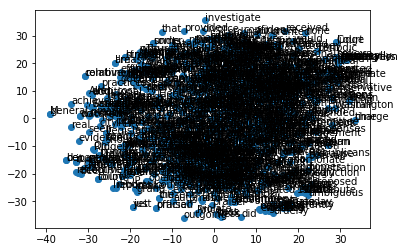

In [42]:
#Visualize the TSNE plot
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
#%matplotlib inline
ax.scatter(df['X'],df['Y'])
#label the data
#ax.set_xlim(-40,40)
#ax.set_ylim(-30,30)
for word,pos in df.iterrows():
    ax.annotate(word,pos)
plt.show()

In [66]:
#use the CONLL data
import nltk
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\BrindhaM\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

In [68]:
from nltk.corpus import conll2000
cp=nltk.RegexpParser('')
test_sent=conll2000.chunked_sents('test.txt',chunk_types=['NP'])
print(cp.evaluate(test_sent))
#The IOB tag accuracy indicates that more than a third of the words are tagged with O, i.e. not in an NP chunk


ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


In [69]:
#Naive regular expression chunker -tags beginning with letters that are characteristic of noun phrase tags (e.g. CD, DT, and JJ).
grammar=r"NP: {<[CDJNP].*>+}"
cp=nltk.RegexpParser(grammar)
print(cp.evaluate(test_sent))

ChunkParse score:
    IOB Accuracy:  87.7%%
    Precision:     70.6%%
    Recall:        67.8%%
    F-Measure:     69.2%%


In [43]:
#import the conll2000 data
from nltk.corpus import conll2000
#import the gensim model
from gensim.models import Word2Vec
#import the keras mdels
from tensorflow.keras.layers import Dense,Embedding,Activation,Flatten
#sequential model
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import collections

C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWa

In [44]:
#get the tokenized words along with pos tags from the corpus
train_words=conll2000.tagged_words('train.txt')
#test words
test_words=conll2000.tagged_words('test.txt')
#print sample
print(train_words[:50])

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ('pound', 'NN'), ('is', 'VBZ'), ('widely', 'RB'), ('expected', 'VBN'), ('to', 'TO'), ('take', 'VB'), ('another', 'DT'), ('sharp', 'JJ'), ('dive', 'NN'), ('if', 'IN'), ('trade', 'NN'), ('figures', 'NNS'), ('for', 'IN'), ('September', 'NNP'), (',', ','), ('due', 'JJ'), ('for', 'IN'), ('release', 'NN'), ('tomorrow', 'NN'), (',', ','), ('fail', 'VB'), ('to', 'TO'), ('show', 'VB'), ('a', 'DT'), ('substantial', 'JJ'), ('improvement', 'NN'), ('from', 'IN'), ('July', 'NNP'), ('and', 'CC'), ('August', 'NNP'), ("'s", 'POS'), ('near-record', 'JJ'), ('deficits', 'NNS'), ('.', '.'), ('Chancellor', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Exchequer', 'NNP'), ('Nigel', 'NNP'), ('Lawson', 'NNP'), ("'s", 'POS'), ('restated', 'VBN'), ('commitment', 'NN'), ('to', 'TO'), ('a', 'DT'), ('firm', 'NN'), ('monetary', 'JJ')]


In [45]:
x=conll2000.sents()
x[:2]

[['Confidence', 'in', 'the', 'pound', 'is', 'widely', 'expected', 'to', 'take', 'another', 'sharp', 'dive', 'if', 'trade', 'figures', 'for', 'September', ',', 'due', 'for', 'release', 'tomorrow', ',', 'fail', 'to', 'show', 'a', 'substantial', 'improvement', 'from', 'July', 'and', 'August', "'s", 'near-record', 'deficits', '.'], ['Chancellor', 'of', 'the', 'Exchequer', 'Nigel', 'Lawson', "'s", 'restated', 'commitment', 'to', 'a', 'firm', 'monetary', 'policy', 'has', 'helped', 'to', 'prevent', 'a', 'freefall', 'in', 'sterling', 'over', 'the', 'past', 'week', '.']]

In [46]:
#print the size of word vocsbulry
len(train_words)

211727

In [47]:
#print the total number of sentences
len(x)

10948

In [48]:
#generte unique pos
def get_tag_vocabulary(tagged_words):
    #accept in the form of (word,tags) and return unique pos tags with unique ids
    tag2id={}
    for item in tagged_words:
        #form - item,pos tag => tag is item[1]
        tag=item[1]
        #setting up the unique pos tag nd the value for the same
        #setdefault:
        #if keys not present,inserts the key along with key value of # of keys present in dict 
        #if key prsent,dont make any update
        tag2id.setdefault(tag,len(tag2id))
        #return
    return tag2id

In [49]:
#the word_vectors.vocab dictionary stores Vocab objects rather than integers
#we want the dictinary to map words to inegers
word2id={k:v.index for k,v in word_vectors.vocab.items()}
#for con112000 dataset,store all the unique tags and correspnding values in tag2id dictionary
tag2id=get_tag_vocabulary(train_words)
#print the tag2id
#print(tag2id)

In [50]:
#Word2id
#print(word2id)
list_index=[]
for (word,index) in word2id.items():
    list_index.append(index)
index_list_s=set(list_index)
print(index_list_s)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [51]:
#function to repalce all words in tagged words with index from word2id and tags with tag fr tag2id
def get_int_data(tagged_words,word2id,tag2id):
    #X to hold ids of the words
    #Y to hold ids o the tags
    X,Y=[],[]
    unk_count=0 #To keep track of unknown wrds representation
    for word,tag in tagged_words:
        #dict..get to return the values for the keys
        Y.append(tag2id.get(tag))
        if word in word2id:
            X.append(word2id.get(word))
        else:
            #word in corpus not present in embedding (trained)
            unk_count+=1
    print("Data created.Pecentage of unknwon words: %.3f" %(unk_count/len(tagged_words)))
    return np.array(X),np.array(Y)
    
            

In [52]:
#set the train and test set
X_Train,Y_Train=get_int_data(train_words,word2id,tag2id)
#set the test set
X_Test,Y_Test=get_int_data(test_words,word2id,tag2id)
#~.14 % of words habe no representation in tersm of tags

Data created.Pecentage of unknwon words: 0.143
Data created.Pecentage of unknwon words: 0.149


In [53]:
#to set right the problem of unknown words 
#lets add the common term UNK to our vocabulary
#approximate UNK vector with mean of all embeddings
def add_new_word(new_word,new_vector,new_index,embedding_matrix,word2id):
    #add a new word to existing embedding matrix along the wor
    embedding_matrix=np.insert(embedding_matrix,[new_index],[new_vector],axis=0)
    
    #updaing the index of word that follow the new word
    #Every addinton in embedding matrix will have corresponding addition in word2id
    word2id={word:(index+1) if index >= new_index else index 
            for word,index in word2id.items()}
    #adding the new word as part of word2id dictionary
    word2id[new_word]=new_index
    return embedding_matrix,word2id



In [54]:
#ssociate unknown word with index 0
UNK_INDEX=0
UNK_TOKEN= 'UNK'

#assign the embedding matrix with vectors from word
embedding_matrix=word_vectors.vectors
#vector/index are diffrent in wor2vec
unk_vector=embedding_matrix.mean(0) 
#print the mean  value of vector across the columns ( 300 columns since 300 dimensions)
print(unk_vector)
embedding_matrix,word2id=add_new_word(UNK_TOKEN,unk_vector,UNK_INDEX,embedding_matrix,word2id)

[ 0.14439283 -0.06920674 -0.00865008 -0.18814936 -0.17191303 -0.01147699
 -0.00867014 -0.02920532 -0.04598523 -0.07943383  0.00568458  0.04192553
  0.00759649 -0.04620024 -0.09014685 -0.00158312  0.04225028  0.0930832
  0.03432184  0.04020489  0.05554649 -0.01242069  0.08259725 -0.1175331
  0.04869303 -0.18189593 -0.01890814  0.04100093 -0.00214505 -0.01253799
 -0.01283228  0.07822512 -0.06901541 -0.09943992 -0.02287875  0.15020496
  0.0042211  -0.14188302 -0.09746271 -0.09050915 -0.02701    -0.17526063
 -0.18831322 -0.01965786 -0.05593216 -0.09207086 -0.08180635  0.00943084
 -0.05172617 -0.2096362   0.06432027  0.06157157  0.0500511  -0.0696902
 -0.04250211  0.08576909  0.05392141  0.05382942  0.01584114 -0.06425181
  0.01629193  0.00264414 -0.10205561  0.066003    0.16908394  0.02453339
  0.00899655 -0.0411165  -0.09848602  0.09503114 -0.08273897 -0.06458087
 -0.08014874 -0.05184146 -0.07120843 -0.02381824 -0.16814208 -0.1149013
 -0.05444511  0.01583816 -0.16534455 -0.09862343 -0.054

In [55]:
#assign the out of vocab with UNK index
#modif the ge_int_Daatt function
def get_int_data(tagged_words,word2id,tag2id):
    X,Y=[],[]
    unk_count=0
    for word,tag in tagged_words:
        Y.append(tag2id.get(tag))
        if word in word2id:
            X.append(word2id.get(word))
        else:
            X.append(UNK_INDEX)
            unk_count+=1
    print("Data created.Pecentage of unknwon words: %.3f" %(unk_count/len(tagged_words)))
    return np.array(X),np.array(Y)

        

In [56]:
#assign X_Train,X_test based on the new values
X_train,Y_train=get_int_data(train_words,word2id,tag2id)
X_test,Y_test=get_int_data(test_words,word2id,tag2id)

Data created.Pecentage of unknwon words: 0.143
Data created.Pecentage of unknwon words: 0.149


In [57]:
#rint the trainng data
print(X_train)

[   0    8    1 ... 2750  802    3]


In [58]:
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [59]:
#print the Target variable
print(Y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
#Define the model for POS classification
#build-compile-summary-fit-ealuate
HIDDEN_SIZE=50
BATCH_SIZE=128

#create the model
def define_model(embedding_matrix,class_count):
    vocab_length = len(embedding_matrix)
    model=Sequential()
    
    #Embedding layer to turn word index to vectors
    #use input length =1 for identifying the context with single words
    model.add(Embedding(input_dim=vocab_length,output_dim=300,weights=[embedding_matrix],input_length=1))
    #flattening layer
    model.add(Flatten())
    #add a dense layer
    model.add(Dense(HIDDEN_SIZE,activation='tanh'))
    #add output layer
    model.add(Dense(class_count,activation='softmax'))
    #compile 
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [63]:
#call the model
pos_model=define_model(embedding_matrix,len(tag2id))
pos_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 300)            4552200   
_________________________________________________________________
flatten (Flatten)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                15050     
_________________________________________________________________
dense_1 (Dense)              (None, 44)                2244      
Total params: 4,569,494
Trainable params: 4,569,494
Non-trainable params: 0
_________________________________________________________________


In [64]:
#Train the model
pos_model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=1,verbose=1)

C:\Users\BrindhaM\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
211727/211727 [==============================] - 215s 1ms/step - loss: 0.6693 - acc: 0.8155


In [65]:
#Evaluate the model
def evaluate_model(model,id2word,x_test,y_test):
    #_,acc=model.evaluate(x_test,y_test)
    #print("Accuracy of the model: %.2f" %acc)
    
    #get the mostly mistagged words
    #Predict the class of the input data
    #y is one of the tags
    y_pred=model.predict_classes(x_test)
    #print the predicted class
    print(y_pred)
    #initiat the counter
    error_counter = collections.Counter()
    
    for i in range(len(x_test)):
        #np.argmax -> returns the index of the maximum value along the column 
        correct_tag_id=np.argmax(y_test[i])
        #if the value or prediction ios not correction
        if y_pred[i]!=correct_tag_id:
            #identify the word and assign to word 
            word=id2word[x_test[i]]
            #increment the counter
            error_counter[word]+=1
    print("Most common errors:\n",error_counter.most_common(10))
    


#Sort the word2id dictionary by the index values
id2word=sorted(word2id,key=word2id.get)
#print the id2word
print(id2word)


In [67]:
id2word=sorted(word2id,key=word2id.get)
print(id2word)

['UNK', 'the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'that', 'is', 'was', 'for', '``', "''", 'The', 'with', 'it', 'as', 'he', 'his', 'on', 'be', ';', 'I', 'by', 'had', 'at', '?', 'not', 'are', 'from', 'or', 'this', 'have', 'an', 'which', '--', 'were', 'but', 'He', 'her', 'one', 'they', 'you', 'all', 'would', 'him', 'their', 'been', ')', '(', 'has', 'will', 'who', 'more', 'out', 'It', 'we', 'she', 'said', 'there', 'up', 'In', ':', 'than', 'them', 'into', 'no', 'its', 'about', 'so', 'when', 'can', 'only', 'other', '!', 'could', 'time', 'if', 'what', 'some', 'But', 'A', 'two', 'any', 'may', 'do', 'first', 'like', 'these', 'over', 'such', 'This', 'me', 'my', 'man', 'our', 'made', 'new', 'most', 'now', 'then', 'must', 'also', 'Af', 'did', 'even', 'back', 'before', 'years', 'through', 'And', 'many', 'She', 'much', 'way', 'down', 'your', 'should', 'There', 'where', 'They', 'Mr.', 'after', 'because', 'people', 'too', 'little', 'those', 'very', 'own', 'make', 'good', 'each', 'well', 'work', '

In [68]:
#Evaluate the model
evaluate_model(pos_model,id2word,X_test,Y_test)
#The worst tagging is for the UNK words


[10 10 10 ... 10 10 14]
Most common errors:
 [('UNK', 5034), ('that', 136), ('have', 51), ('as', 37), ('out', 32), ('more', 30), ('move', 18), ('about', 18), ('executive', 18), ('American', 18)]


In [84]:
pos_model.predict(X_test)

array([[2.0719881e-01, 6.2842749e-04, 1.1614649e-04, ..., 6.6548171e-05,
        1.3191235e-04, 1.0111207e-04],
       [6.3351053e-04, 1.4497156e-04, 1.0657540e-04, ..., 2.0757464e-06,
        4.2476354e-06, 1.8506618e-06],
       [4.0374938e-04, 1.9722084e-04, 1.8034769e-04, ..., 1.8641000e-06,
        3.5780636e-06, 1.8088821e-06],
       ...,
       [1.5268273e-04, 9.5733027e-05, 1.8159644e-04, ..., 1.1054262e-06,
        1.0151065e-06, 1.1232904e-06],
       [2.0719881e-01, 6.2842749e-04, 1.1614649e-04, ..., 6.6548171e-05,
        1.3191235e-04, 1.0111207e-04],
       [2.3565184e-08, 3.7795988e-05, 2.8622922e-05, ..., 2.8970042e-05,
        1.5235699e-05, 6.6226285e-06]], dtype=float32)

In [70]:
#Lets build context dependant model
#Lets take more than one index as input
#e end-of-sequence (EOS)
EOS_INDEX=1
EOS_TOKEN="EOS"

#Create a random end of sequence vector
#300 dim random standard normal distrituion
eos_vector=np.random.standard_normal(300)
#call the add new word for the embedding matrix
#embedding_matrix,word2id=add_new_word(EOS_TOKEN,eos_vector,EOS_INDEX,embedding_matrix,word2id)

In [71]:
eos_vector

array([-0.44837314, -0.10096039, -0.45550469,  0.7327724 ,  0.76236857,
        0.5378877 ,  0.13158314,  1.28127455,  0.12301581, -0.46684914,
        1.40520714,  0.80995732,  1.36669104, -0.06392584, -0.42376708,
       -0.29648243,  0.96933818,  0.27950001, -0.41108711,  0.26007075,
       -0.10656147,  1.28421829, -0.51662133, -0.49373636,  1.11975245,
        0.74763797,  1.32793804, -0.35091641,  0.42325658,  0.42042241,
       -2.2703056 , -0.38395426, -0.69776524, -2.17340333,  1.30984029,
       -1.38973295, -0.25511403,  1.41860416,  0.66781306, -1.30355271,
       -0.22507738,  0.03846687,  0.2575265 ,  0.22082762,  1.18656067,
       -0.55323428, -0.67001373, -0.54516286,  0.03959696,  1.79352709,
       -1.53522417, -0.44047073,  0.92670375, -1.05051943, -1.26914493,
        0.62938407, -0.53831339,  0.847685  ,  0.30482719,  1.19331801,
        0.08387738,  0.80205701,  2.55507769,  0.37399093, -0.59242076,
       -0.91413165,  0.6824596 , -0.72836283,  0.69618292, -3.04

In [72]:
#deine the context size
CONTEXT_SIZE=2

def get_window_int_data(tagged_words,word2id,tag2id):
    X,Y=[],[]
    unk_count=0
    
    #defiune the span
    span=2*CONTEXT_SIZE +1 #window target window
    #Define a dequeue for better append/deletion of elements 
    #the queue holds lenght of 5
    buffer=collections.deque(maxlen=span)
    #output of (EOS,None),(EOS,None)
    padding=[(EOS_TOKEN,None)]*CONTEXT_SIZE
    
    buffer+=padding + tagged_words[:CONTEXT_SIZE]
    
    for item in (tagged_words[CONTEXT_SIZE:] + padding):
        buffer.append(item)
        
        #the input to the model is the ids of all words in the window
        window_ids= np.array([word2id.get(word) if (word in word2id) else UNK_INDEX
                             for (word,_) in buffer])
        X.append(window_ids)
        #the label is the tag of the middle word
        middle_word,middle_tag=buffer[CONTEXT_SIZE]
        Y.append(tag2id.get(middle_tag))
        
        if middle_word not in word2id:
            unk_count+=1
    print("Data created Percentage of unknown words:%.3f"  %(unk_count/len(tagged_words)))
    return np.array(X),np.array(Y)

deque([], maxlen=5)


In [73]:
#Define the model

#creaets and return the context senistive model
def context_sensitive_model(embedding_matrix,class_count):
    vocab_length = len(embedding_matrix)
    total_span=CONTEXT_SIZE*2 + 1
    model = Sequential()
    model.add(Embedding(input_dim=vocab_length,output_dim=300,weights=[embedding_matrix],input_length=total_span))
    model.add(Flatten())
    model.add(Dense(HIDDEN_SIZE,activation='tanh'))
    model.add(Dense(class_count,activation='softmax'))
    
    #compile
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [74]:
#lets get the train and test words
X_train2,Y_train2=get_window_int_data(train_words,word2id,tag2id)


Data created Percentage of unknown words:0.143


In [80]:
#call the model
cs_pos_model=context_sensitive_model(embedding_matrix,len(tag2id))


In [81]:
cs_pos_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5, 300)            4552200   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                75050     
_________________________________________________________________
dense_3 (Dense)              (None, 44)                2244      
Total params: 4,629,494
Trainable params: 4,629,494
Non-trainable params: 0
_________________________________________________________________


In [82]:
X_test2,Y_test2=get_window_int_data(test_words,word2id,tag2id)
Y_train2,Y_test2=to_categorical(Y_train2),to_categorical(Y_test2)

Data created Percentage of unknown words:0.149


In [88]:
#Evaluate the model
evaluate_model(cs_pos_model,id2word,X_test2,Y_test2)
#The worst tagging is for the UNK words

[20 34  2 ... 31 20 39]


TypeError: only integer scalar arrays can be converted to a scalar index